Name: Zetao Zhu

ID：ZXZ690


## Problem descripition

In my assignment, the problme is similar with coin flipping mentioned in slides. Two different color ball are put in a box, which is non-transparent. One kind of ball is black and the other is white. The experiment is that: take one ball from box one time and put back the ball. Thus, each taking the probability of taking black ball is θ and white one is (1-θ). The binomial distribution specifies the probability of the total number of black balls(y), out of n trials:

Because the number of both black and white balls are uncertain, the hidden parameter is the probability of taking a blackθ. The goal of this experiment is to estimate the hidden parameter with the result of several trials.

# Data

The result from every experiment is black(0), white(1). The probability of getting black is θ. Since there is only two kinds of color in box, the probability of white ball is (1-θ).

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [11]:
# Generate random result
def randomResult(n):
    result = np.random.randint(0, 2, size=n)
    return result

print (randomResult(20))

[0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1]


In [36]:
#Factorial operator
def fo(n,m):
    f = math.factorial
    return (f(n))//(f(m)*f(n-m))

In [21]:
#Likelihood
def likelihood(theta, n):
    sum_likelihood = [];
    for i in range(1, n+1):
        likelihood_i = fo(n,i) * (theta**i)*(1-theta)**(n-i)
        sum_likelihood.append(likelihood_i)
        
    return sum_likelihood
        

In [22]:
#test
print (likelihood(1/3.0, 20))

[0.003007286598217181, 0.01428461134153161, 0.04285383402459482, 0.09106439730226397, 0.14570303568362233, 0.18212879460452788, 0.18212879460452783, 0.14797964561617885, 0.09865309707745255, 0.054259203392598904, 0.02466327426936313, 0.009248727851011173, 0.0028457624156957447, 0.0007114406039239361, 0.0001422881207847872, 2.2232518872623e-05, 2.6155904556027052e-06, 2.179658713002254e-07, 1.1471887963169754e-08, 2.867971990792438e-10]


In [23]:
#Draw BarChar

def barChart(input):
    x_input = [x for x in range(1,len(input)+1)]
    plt.bar(x_input, input, 0.75, color="green")
    plt.xlabel('y')
    plt.ylabel('likelihood')
    plt.show()

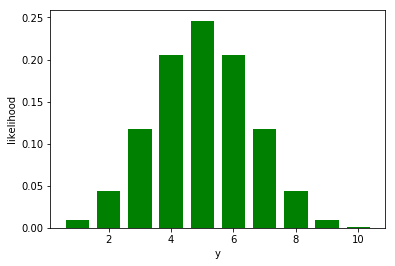

In [44]:
#test1 when 

input = likelihood(0.5, 10)
barChart(input)

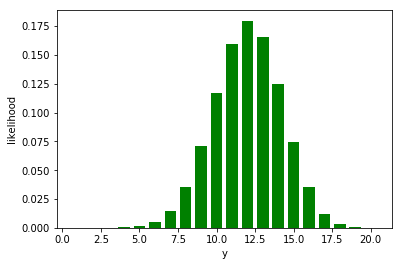

In [25]:
#test2

input = likelihood(0.6, 20)
barChart(input)

# Applying Bayes' Rule

The goal of this experiment is to estimate θ by y and n. By applying Rayes' rule, we can get:<br>
$$p(\theta | y, n) = \dfrac{p(y | \theta, n)p(\theta | n)}{p(y | n)}$$<br>
The posterior is p($\theta$ | y,n) <br>
The likelihood is p(y | $\theta$ | y,n) <br>
The prior is p($\theta$ | n) <br>

We have calulate likehood above and  don't know how to calulate the prior. However, the value of prior would be a value between [0 1]. Thus, the posterior is proportional to likelihood. Besides, Bayes in his original paper in 1763 showed that: p(y|n) = 1 / n+1. So, we can calulate the value of posterior now. The function is shown below:<br>
 p($\theta$ | y, n) = C$_y^n$ * $\theta$$^y$ * (1-y)$^{n-y}$ * (1+n)

In [66]:
# calculate posterior

def calPosterior(y,n):
    theta = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    result = []
    for i in theta:
        posterior_i = fo(n,y) * (i**y)*(1-i)**(n-y) * (n+1)
        result.append(posterior_i)
    plt.plot(theta, result,'-' , linewidth=2)
    plt.show()        

28


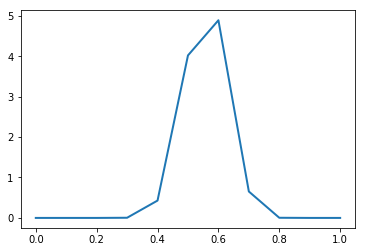

In [50]:
data = randomResult(50);
y = np.count_nonzero(data == 1)
print(y)
calPosterior(y,50)


When randomly put 50 black and white balls in box. y=28, n=50. From the chart the θ is 0.6, which approximately equals 28/50.

54


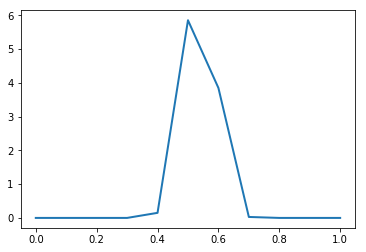

In [55]:
data = randomResult(100);
y = np.count_nonzero(data == 1)
print(y)
calPosterior(y,100)

When randomly put 100 black and white balls in box. y=59, n=100. From the chart the θ is 0.55, which approximately equals 59/100. It is more precise than n=50.

247


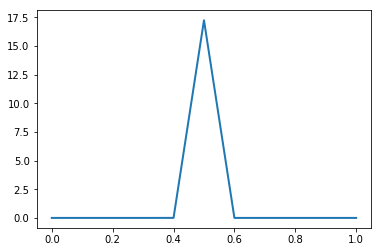

In [56]:
data = randomResult(500);
y = np.count_nonzero(data == 1)
print(y)
calPosterior(y,500)

When n comes to 500, y = 248. From the chart the θ is 0.5, which approximately equals 247/500.This is a good estimate of θ.